# Building a Linear Regression Model to Predict House Prices in Pune

---



# Step 1: Understanding the Data and Defining the Problem

1. The objective of the project is to analyse and predict housing prices in Pune, India. using the Pune Housing Dataset.
2. We are Using a Linear Regression Model to solve the problem. Primary reason to use Linear Regression is because we want to predict continuous values (like house prices) based on one or more input features.
3. we want a relationship between house features and the house price.
4. Now let us see the column overview of the dataset:

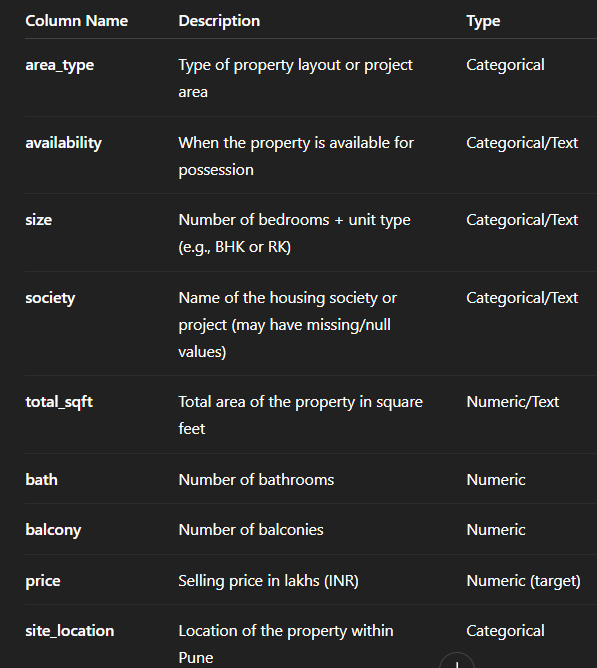

There are a total of 9 columns (Features - 8), ( Target - 1 {Price})


In [ ]:
# Uploading the dataset since We are using Google Colab
from google.colab import files
uploaded = files.upload()

Saving Pune_House_Data.csv to Pune_House_Data (8).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df = pd.read_csv("Pune_House_Data.csv")
df.head(10)


,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road
5,Super built-up Area,Ready To Move,2 BHK,DuenaTa,1170,2.0,1.0,38.00,Balaji Nagar
6,Super built-up Area,18-May,4 BHK,Jaades,2732,4.0,NaN,204.00,Baner
7,Super built-up Area,Ready To Move,4 BHK,Brway G,3300,4.0,NaN,600.00,Baner road
8,Super built-up Area,Ready To Move,3 BHK,NaN,1310,3.0,1.0,63.25,Bhandarkar Road
9,Plot Area,Ready To Move,6 Bedroom,NaN,1020,6.0,NaN,370.00,Bhavani Peth


In [ ]:
df.shape # (no of rows/records, no of columns)

(13320, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


We need to make sure all values are of type numeric - Because we are implementing a Linear Regression Model

In [ ]:
# Finding all the unique values in a column
for col in df.columns:
    print(f"Unique values in '{col}':")
    print("\n")
    print(df[col].unique())
    print("-" * 50)


Unique values in 'area_type':


['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
--------------------------------------------------
Unique values in 'availability':


['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']
--------------------------------------------------

From the above Inference we could say that the dataset requires a lot of Preprocessing.

# Step 2: Preprocessing the Data

In [ ]:
df.isnull().sum() # null values present in each column

,0
area_type,0
availability,0
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0
site_location,1


Now Lets focus on Categorical Columns which are:
1. Area_type
2. Availability
3. Size
4. Site_location

In [ ]:
df['area_type'].value_counts() # counts the no of occurrence of each class in a column

,count
area_type,
Super built-up Area,8790
Built-up Area,2418
Plot Area,2025
Carpet Area,87


In [ ]:
df['availability'].value_counts()

,count
availability,
Ready To Move,10581
18-Dec,307
18-May,295
18-Apr,271
18-Aug,200
...,...
16-Oct,1
17-Jan,1
16-Nov,1


This availability dataset needs preprocessing we can do it in either of these ways:
1. keep the classes as (Ready to Move and Not Ready to Move) convert the dates to not ready to move.
2. Else Assume a current date E.g (Jan 1, 2025) and assume that all sites are ready to move within this year because dataset lacks the year.

In [ ]:
from datetime import datetime

In [ ]:
curr_date = datetime(2025,1,1)

def days_availability(avl):
  try:
    avl_date = datetime.strptime(avl , "%d-%b")
    avl_date = avl_date.replace(year = curr_date.year)
    diff = (avl_date - curr_date).days
    return max(0, diff)
  except ValueError:
    return 0

df['avl_in_days'] = df['availability'].apply(days_availability) # this is called Feature Engineering creating a new feature

In [ ]:
print(df['avl_in_days'])

0        352
1          0
2          0
3          0
4          0
        ... 
13315      0
13316      0
13317      0
13318    168
13319      0
Name: avl_in_days, Length: 13320, dtype: int64


In [ ]:
# Here we Implement another case mentioned above
df['availability'] = df['availability'].apply(lambda x: 'Ready To Move' if x=='Ready To Move' else 'Not Ready')
df['availability']

,availability
0,Not Ready
1,Ready To Move
2,Ready To Move
3,Ready To Move
4,Ready To Move
...,...
13315,Ready To Move
13316,Ready To Move
13317,Ready To Move
13318,Not Ready


We will Choose which method to use in the future for now we just create an option for both the methods

In [ ]:
df.groupby('size')['size'].agg('count')

,size
size,
1 BHK,538
1 Bedroom,105
1 RK,13
10 BHK,2
10 Bedroom,12
11 BHK,2
11 Bedroom,2
12 Bedroom,1
13 BHK,1


In [ ]:
df['size'] = df['size'].replace('1RK', '0 BHK')
df[['number_of_bedrooms', 'BHK']] = df['size'].str.split(' ', expand=True) # creates two new columns
df['number_of_bedrooms'] = pd.to_numeric(df['number_of_bedrooms'])


In [ ]:
# Now we can drop the size column and BHK columns - redundant
df.drop(columns=['size', 'BHK'], inplace=True)

In [ ]:
df.head(5)

,area_type,availability,society,total_sqft,bath,balcony,price,site_location,avl_in_days,number_of_bedrooms
0,Super built-up Area,Not Ready,Coomee,1056,2.0,1.0,39.07,Alandi Road,352,2.0
1,Plot Area,Ready To Move,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk,0,4.0
2,Built-up Area,Ready To Move,NaN,1440,2.0,3.0,62.00,Anandnagar,0,3.0
3,Super built-up Area,Ready To Move,Soiewre,1521,3.0,1.0,95.00,Aundh,0,3.0
4,Super built-up Area,Ready To Move,NaN,1200,2.0,1.0,51.00,Aundh Road,0,2.0


Total Sqft column: some records have a range of values we need to convert them. best we can do is take the average

In [ ]:
def sqft(x):
  values = x.split('-')
  if len(values) == 2:
    return (float(values[0])+float(values[1]))/2
  try:
    return float(x)
  except:
    return None

df['total_sqft'] = df['total_sqft'].apply(sqft)

In [ ]:
df.sample(3)

,area_type,availability,society,total_sqft,bath,balcony,price,site_location,avl_in_days,number_of_bedrooms
146,Super built-up Area,Ready To Move,Somumys,1828.0,3.0,NaN,110.0,Laxmi Road,0,3.0
2170,Super built-up Area,Ready To Move,GMown E,870.0,2.0,1.0,39.5,Mukund Nagar,0,2.0
9670,Super built-up Area,Ready To Move,Sravema,1200.0,2.0,3.0,42.0,Prabhat Road,0,2.0


In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
society,5502
total_sqft,46
bath,73
balcony,609
price,0
site_location,1
avl_in_days,0
number_of_bedrooms,16


society column has 5502 missing values which is close to 50 percent of the total no of records. removing this column will serve better. because handling the missing values through mean/median or data extrapolation for such huge null values can lead to errors or not accurate predictions.

In [ ]:
df.drop(columns=['society'], inplace=True)

In [ ]:
df[['price', 'balcony']].corr()


,price,balcony
price,1.000000,0.120355
balcony,0.120355,1.000000


We can Replace missing values in balcony with the median reason for choosing the median instead of mean is:
1. mean is sensitive to outliers and average can sometimes be floating points which does not make sense.
2. and balcony has a lesser correlation factor with prices.
3. we can also remove the missing values as it is barely 5% of the dataset. I am choosing to remove here..
4. I am doing the same for other missing values also

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
total_sqft,0
bath,0
balcony,0
price,0
site_location,0
avl_in_days,0
number_of_bedrooms,0


Now we have to convert our categorical column data. which is done by encoding.
1. Area_type - the type of area matters so we do ordinal encoding
2. Availability - We use Label Encoding because only two categories present (Ready / Not Ready)
3. Site_location  - This data has a lot of unique values but also important because a properties site is important to set the price. so we use something called mean encoding which is a technique used to convert categorical variables into numerical values by replacing each category with the mean of the target variable for that category. but data leakage can occur because we are using the target values so this is not done at the moment.

In [ ]:
df['area_type'] = df['area_type'].astype(str) # since area_type is an object
area_type_ord = df.groupby('area_type')['price'].mean().sort_values().index
print(area_type_ord)


Index(['Carpet  Area', 'Super built-up  Area', 'Built-up  Area', 'Plot  Area'], dtype='object', name='area_type')


In [ ]:
area_map = {key:i for i,key in enumerate(area_type_ord,0)}
df['area_type'] = df['area_type'].map(area_map)
area_map

{'Carpet  Area': 0,
 'Super built-up  Area': 1,
 'Built-up  Area': 2,
 'Plot  Area': 3}

In [ ]:
df['area_type'].unique()

array([1, 3, 2, 0])

In [ ]:
df['availability'] = df['availability'].apply(lambda x:1 if x=='Ready To Move' else 0)
df['availability'].unique()

array([0, 1])

# Step 3: Data Exploration and Visualization

In [ ]:
df.head()

,area_type,availability,total_sqft,bath,balcony,price,site_location,avl_in_days,number_of_bedrooms
0,1,0,1056.0,2.0,1.0,39.07,Alandi Road,352,2.0
1,3,1,2600.0,5.0,3.0,120.00,Ambegaon Budruk,0,4.0
2,2,1,1440.0,2.0,3.0,62.00,Anandnagar,0,3.0
3,1,1,1521.0,3.0,1.0,95.00,Aundh,0,3.0
4,1,1,1200.0,2.0,1.0,51.00,Aundh Road,0,2.0


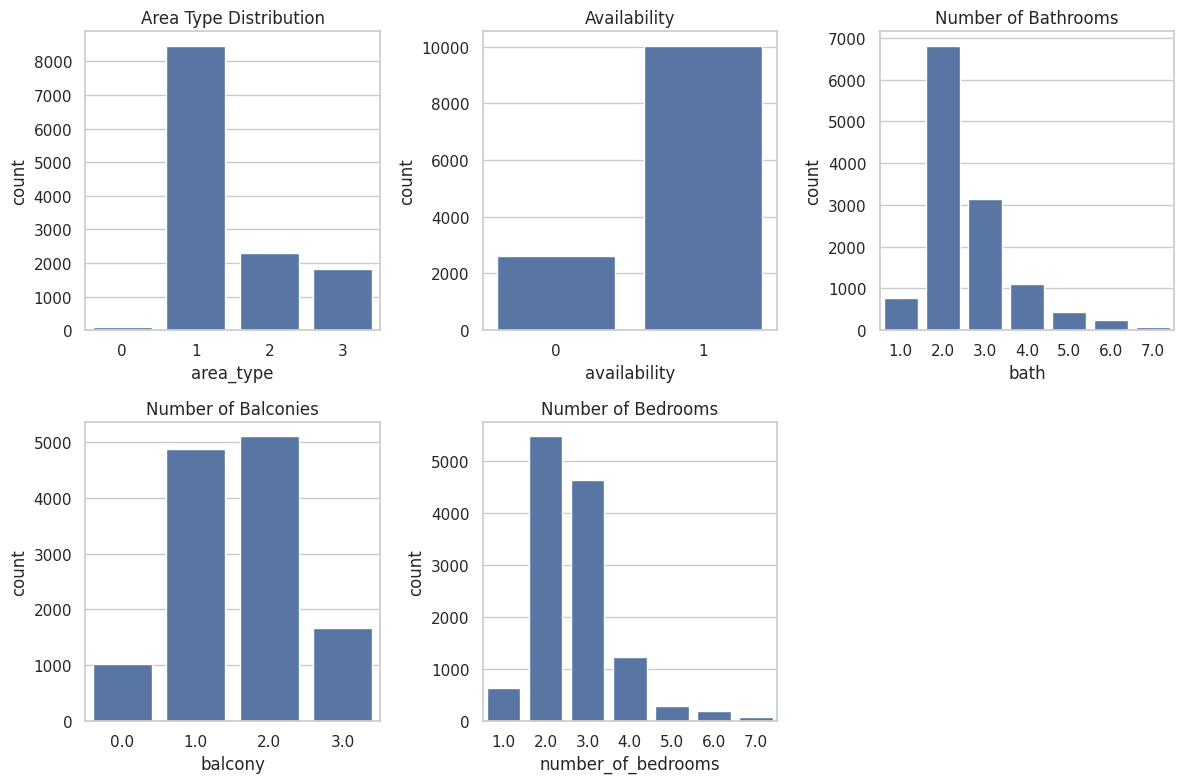

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))

df_bath = df[df['bath']<=7]
df_bed = df[df['number_of_bedrooms']<=7]

plt.subplot(2, 3, 1)
sns.countplot(data=df, x='area_type')
plt.title('Area Type Distribution')


plt.subplot(2, 3, 2)
sns.countplot(data=df, x='availability')
plt.title('Availability')


plt.subplot(2, 3, 3)
sns.countplot(data=df_bath, x='bath')
plt.title('Number of Bathrooms')


plt.subplot(2, 3, 4)
sns.countplot(data=df, x='balcony')
plt.title('Number of Balconies')


plt.subplot(2, 3, 5)
sns.countplot(data=df_bed, x='number_of_bedrooms')
plt.title('Number of Bedrooms')
plt.tight_layout()
plt.show()


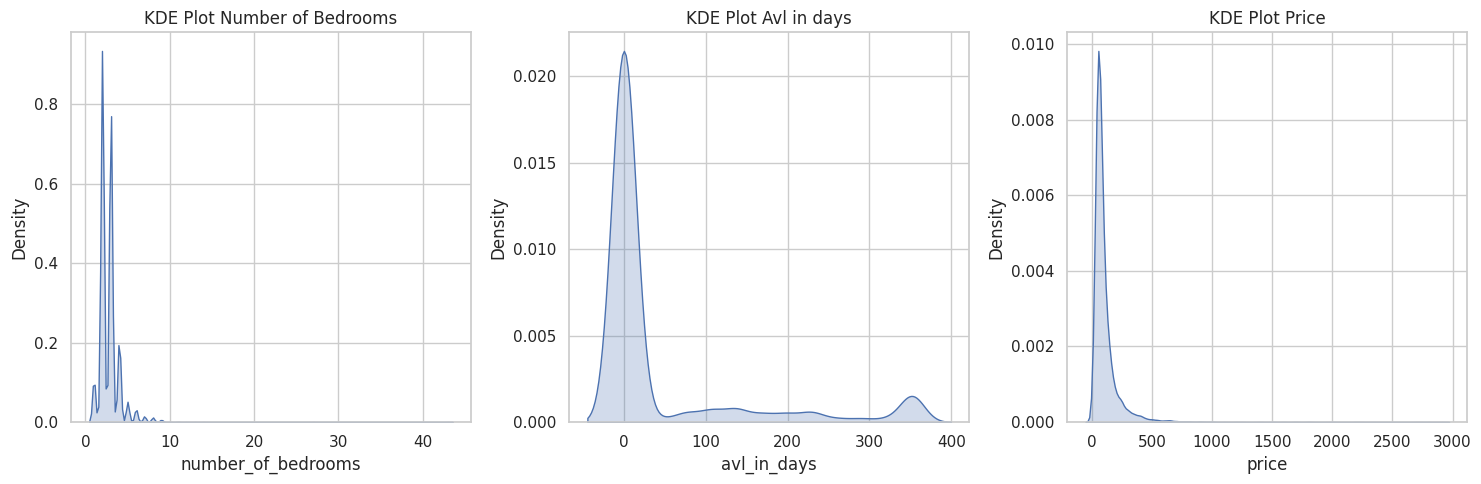

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.kdeplot(df['number_of_bedrooms'],fill =True)
plt.title('KDE Plot Number of Bedrooms')

plt.subplot(1,3,2)
sns.kdeplot(df['avl_in_days'],fill =True)
plt.title('KDE Plot Avl in days')

plt.subplot(1,3,3)
sns.kdeplot(df['price'],fill =True)
plt.title('KDE Plot Price')
plt.tight_layout()
plt.show()

We can figure out that from the above two visualization there are outliers present in the dataset especially for no of bathrooms, price and number of bedrooms  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12668 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   area_type           12668 non-null  int64  
 1   availability        12668 non-null  int64  
 2   total_sqft          12668 non-null  float64
 3   bath                12668 non-null  float64
 4   balcony             12668 non-null  float64
 5   price               12668 non-null  float64
 6   site_location       12668 non-null  object 
 7   avl_in_days         12668 non-null  int64  
 8   number_of_bedrooms  12668 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 989.7+ KB


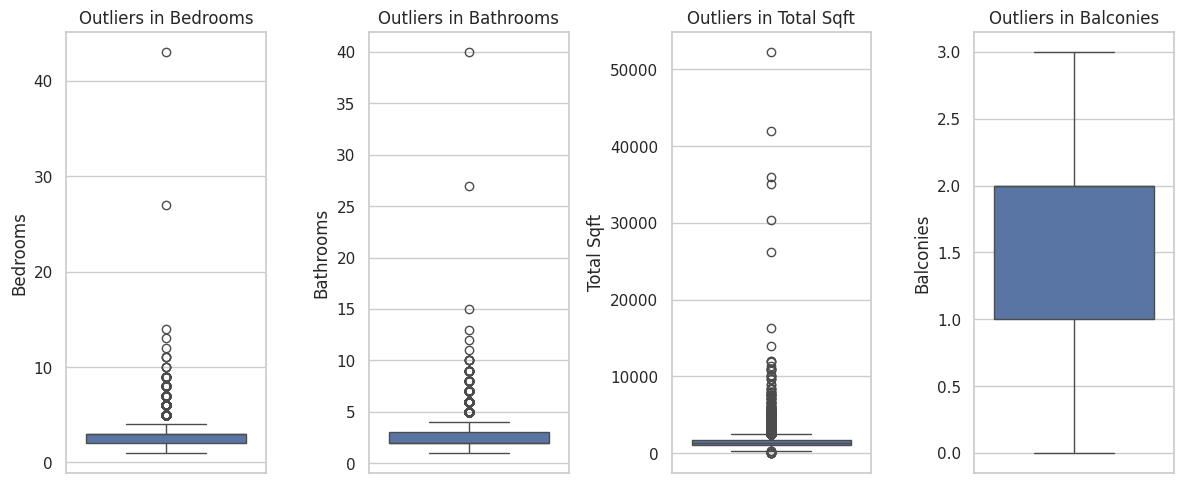

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 5))

plt.subplot(1, 4, 1)
sns.boxplot(data=df, y='number_of_bedrooms')
plt.title('Outliers in Bedrooms')
plt.ylabel('Bedrooms')

plt.subplot(1, 4, 2)
sns.boxplot(data=df, y='bath')
plt.title('Outliers in Bathrooms')
plt.ylabel('Bathrooms')

plt.subplot(1, 4, 3)
sns.boxplot(data=df, y='total_sqft')
plt.title('Outliers in Total Sqft')
plt.ylabel('Total Sqft')

plt.subplot(1, 4, 4)
sns.boxplot(data=df, y='balcony')
plt.title('Outliers in Balconies')
plt.ylabel('Balconies')

plt.tight_layout()
plt.show()



Outliers present in bedrooms, bathrooms, and total sqft

In [ ]:
def clip_outliers(df, column , lower_percentile = 0, upper_percentile = 95):
    l_b = df[column].quantile(lower_percentile/100)
    u_b = df[column].quantile(upper_percentile/100)
    df[column] = df[column].clip(lower = l_b, upper = u_b)
    return df
df = clip_outliers(df, 'total_sqft')
df = clip_outliers(df, 'number_of_bedrooms')
df = clip_outliers(df, 'bath')

values above the 95th percentile value is capped at value of 95th percentile. since we are dealing with upper outliers only.

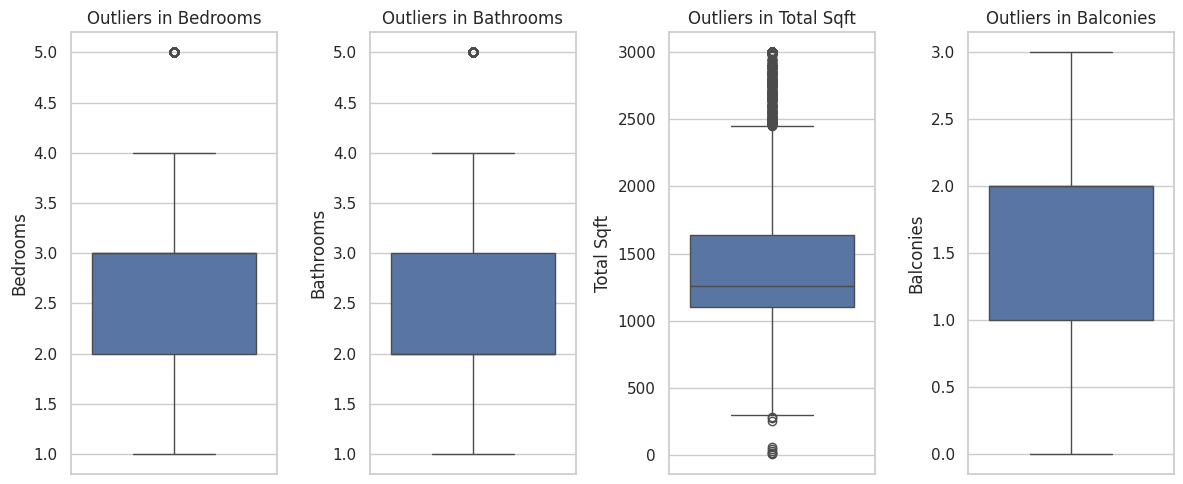

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 5))

plt.subplot(1, 4, 1)
sns.boxplot(data=df, y='number_of_bedrooms')
plt.title('Outliers in Bedrooms')
plt.ylabel('Bedrooms')

plt.subplot(1, 4, 2)
sns.boxplot(data=df, y='bath')
plt.title('Outliers in Bathrooms')
plt.ylabel('Bathrooms')

plt.subplot(1, 4, 3)
sns.boxplot(data=df, y='total_sqft')
plt.title('Outliers in Total Sqft')
plt.ylabel('Total Sqft')

plt.subplot(1, 4, 4)
sns.boxplot(data=df, y='balcony')
plt.title('Outliers in Balconies')
plt.ylabel('Balconies')

plt.tight_layout()
plt.show()

still sqft tends to have a lot of outliers

In [ ]:
df['total_sqft'] = df['total_sqft'].clip(lower = df['total_sqft'].quantile(0.01), upper = df['total_sqft'].quantile(0.99))

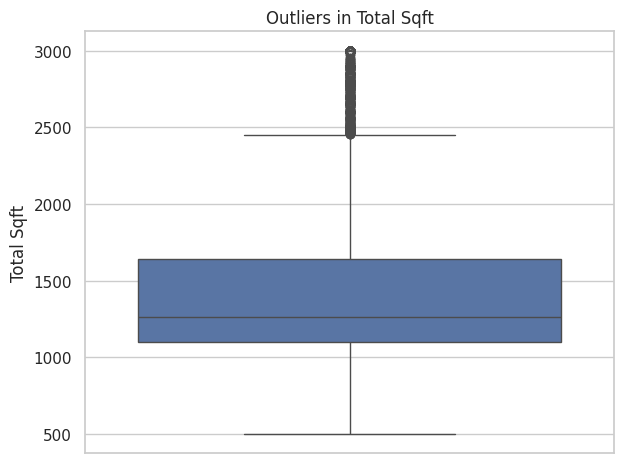

In [ ]:
sns.boxplot(data=df, y='total_sqft')
plt.title('Outliers in Total Sqft')
plt.ylabel('Total Sqft')

plt.tight_layout()
plt.show()

Still we have more outliers. but changing too many data can result in instability and corruption of dataset

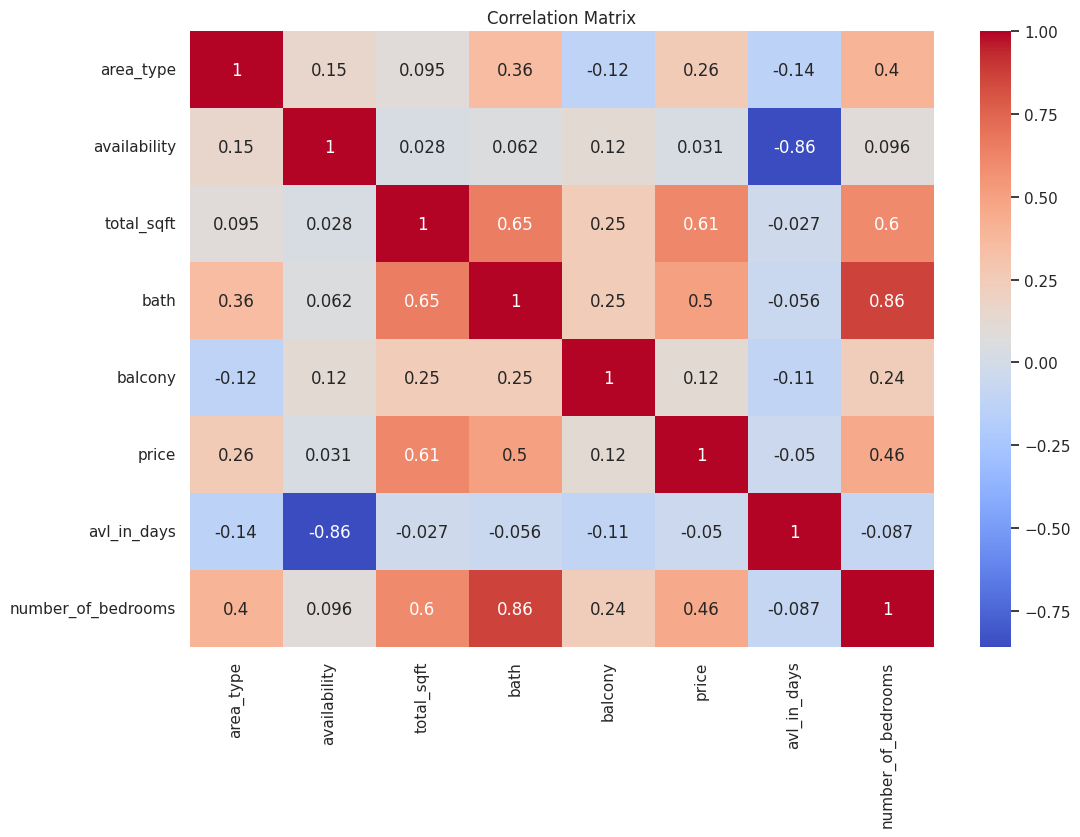

In [ ]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Figure size 1200x1000 with 0 Axes>

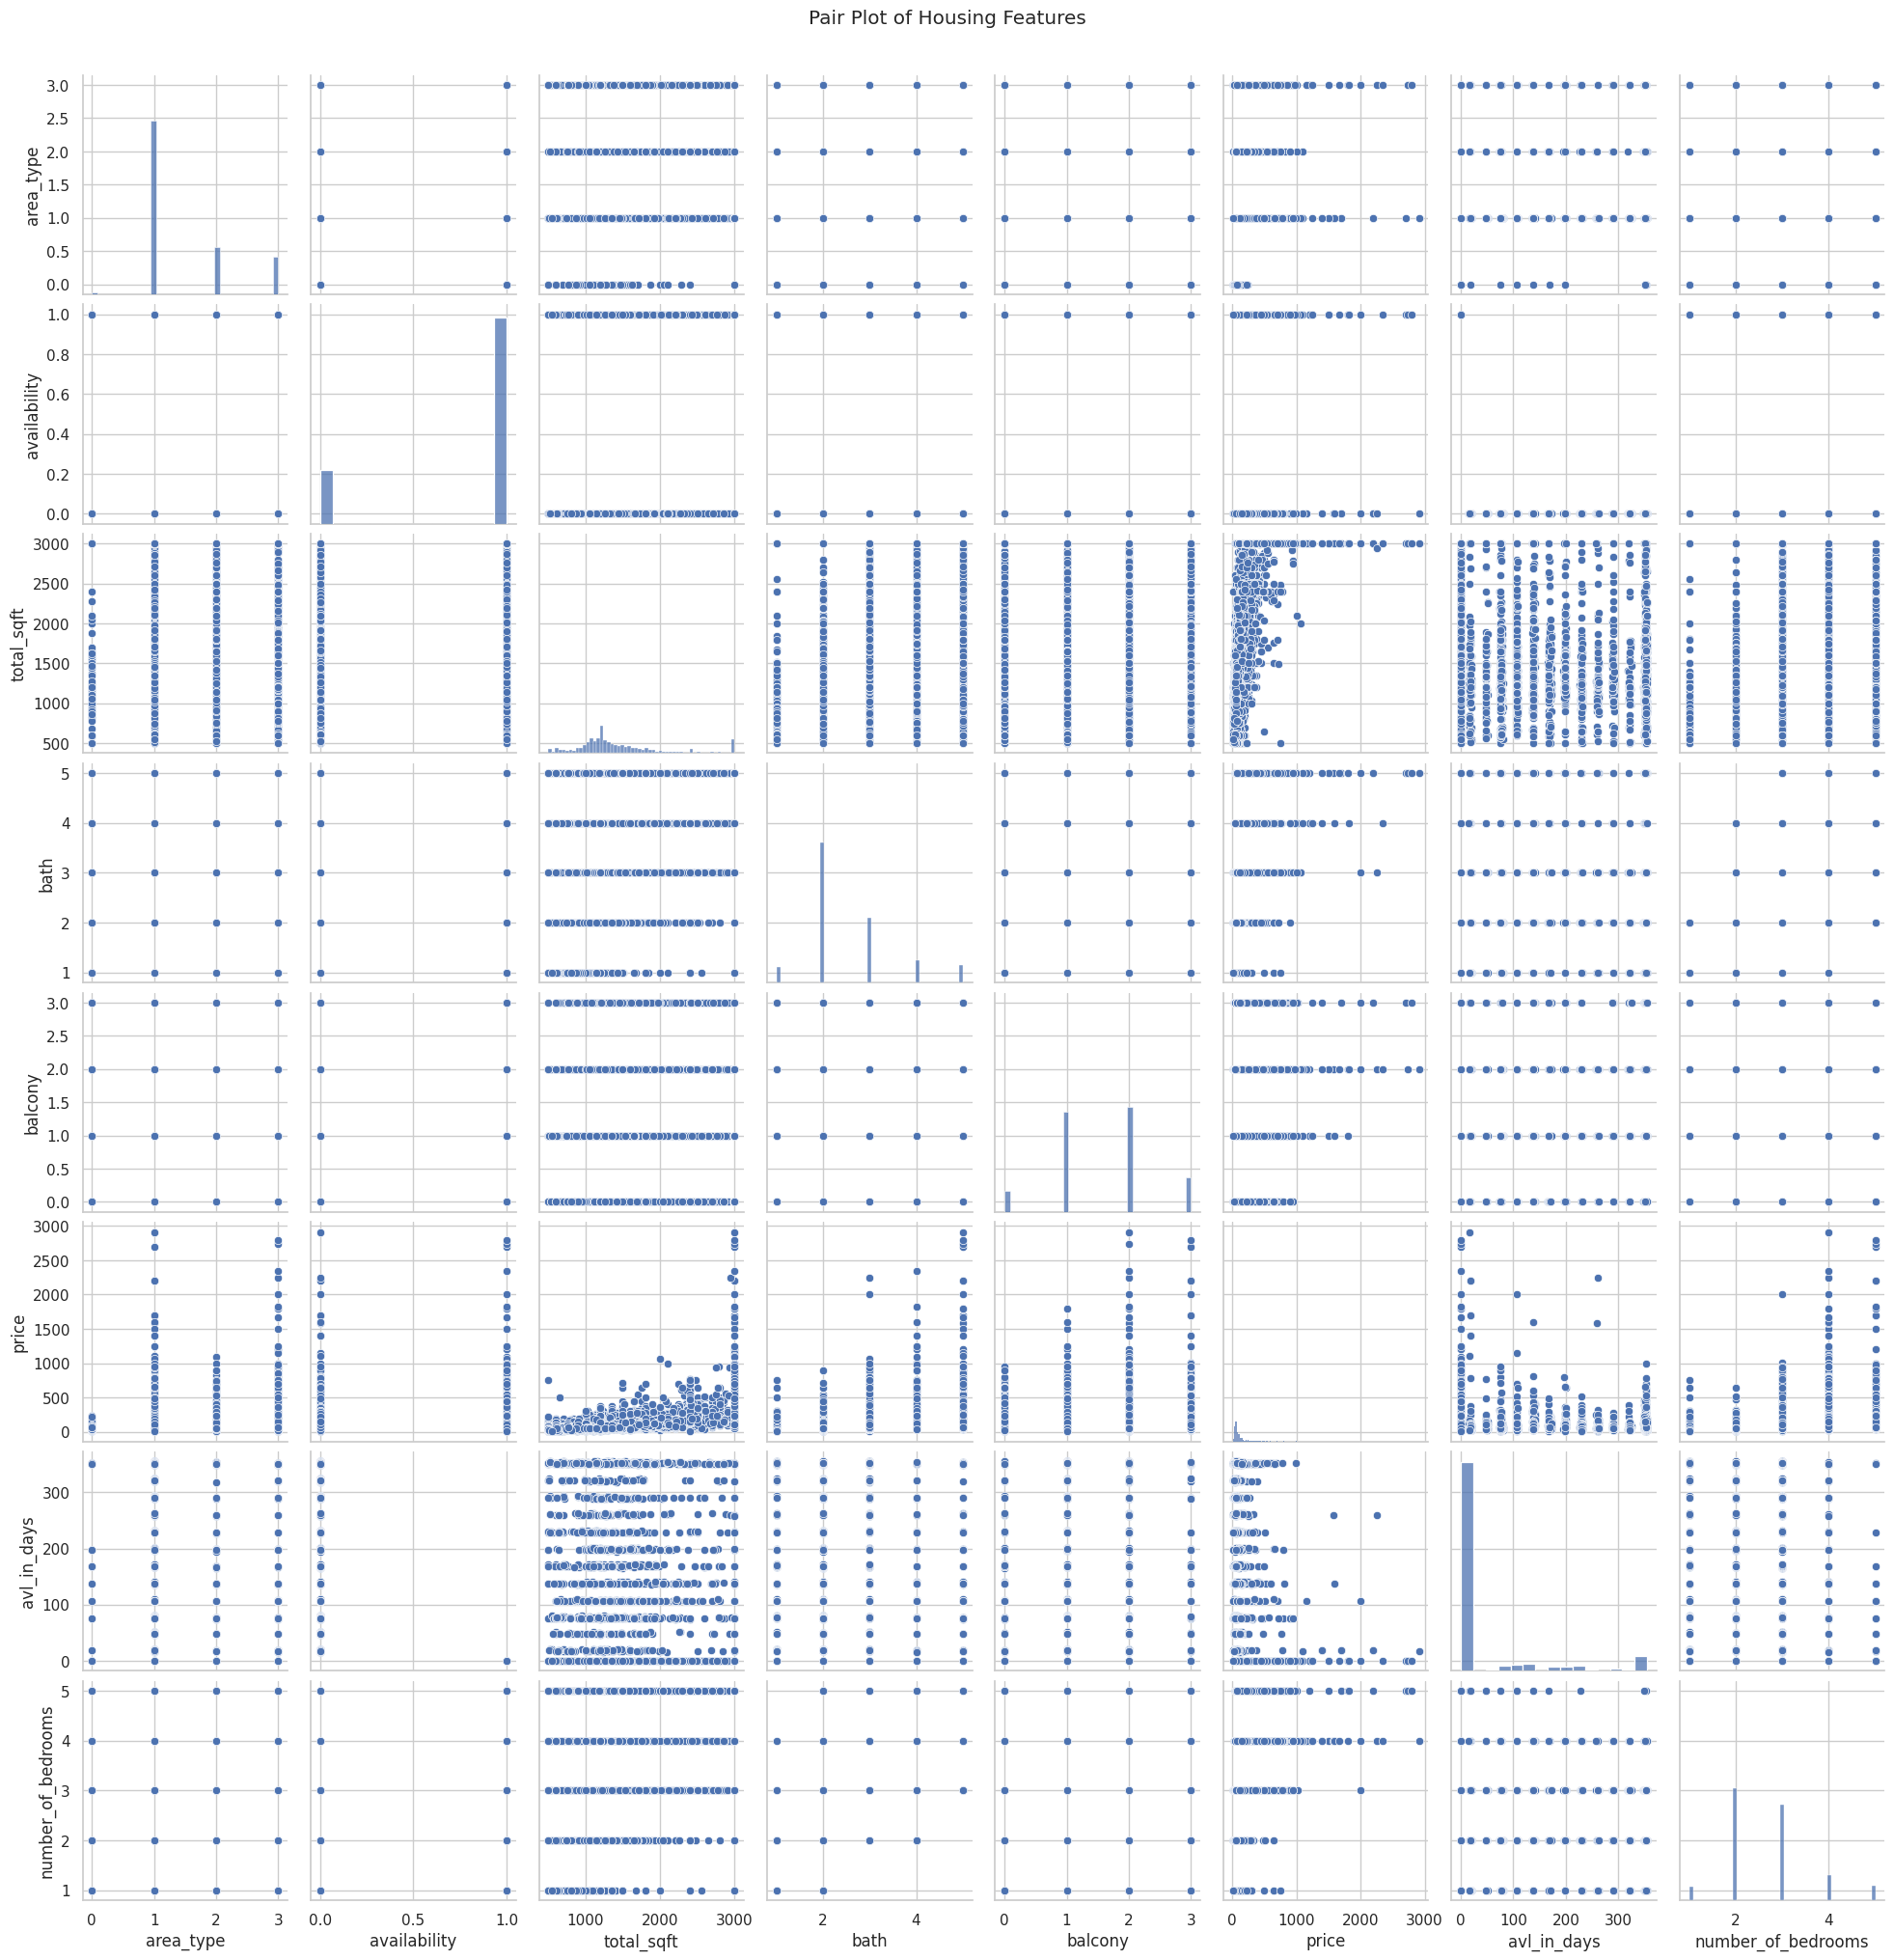

In [ ]:
plt.figure(figsize=(12,10))
sns.pairplot(df.select_dtypes(include=np.number))
plt.suptitle("Pair Plot of Housing Features", y=1.02)
plt.show()


We need pair plot to visualize the data because correlation matrix doesnt show shape of distribution. pair plot will reveal the plateau visually and we can see that our data is not fully linear in nature because multiple features affect the target (price)

In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
total_sqft,0
bath,0
balcony,0
price,0
site_location,0
avl_in_days,0
number_of_bedrooms,0


# Step 4: Data Normalization

In [ ]:
X = df.drop('price',axis = 1)
y = df['price']

Multicollinearity check : what it means ?
1. two or more independent variables (the features) are highly correlated with each other
2. for example  if no of bedrooms is always tightly related to total sqft like more sqft --> more bedrooms then they are truely not independent. our model is supposed to assume all input features bring unique information
3. it is a problem because: Linear regression is interpretable because each coefficient tells you:
“Holding other variables constant how much does this feature affect the target”
But with multicollinearity:
“Holding others constant” doesn't make sense because the features are not independent
4. We use VIF score (Variance Inflation Factor)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
num_features = X.select_dtypes(include=np.number).columns
vif = pd.DataFrame()
vif['Features'] = num_features
vif['VIF'] = [variance_inflation_factor(X[num_features].values, i) for i in range(X[num_features].shape[1])]
vif

,Features,VIF
0,area_type,6.315920
1,availability,8.190046
2,total_sqft,12.921494
3,bath,35.919325
4,balcony,5.245484
5,avl_in_days,2.148627
6,number_of_bedrooms,39.399639


If VIF score is more than 10 it is considered to have strong multicollinearity. 5-10 is risk of multicollinearity. but i feel in this dataset it is better to remove the bathroom column and check our VIF score.

**Note:** Changing my opinion here because my R2 score improved when i removed both bath and no of bedrooms.

In [ ]:
X.drop('number_of_bedrooms',axis = 1, inplace=True)

In [ ]:
num_features = X.select_dtypes(include=np.number).columns
vif = pd.DataFrame()
vif['Features'] = num_features
vif['VIF'] = [variance_inflation_factor(X[num_features].values, i) for i in range(X[num_features].shape[1])]
vif

,Features,VIF
0,area_type,5.914644
1,availability,7.927025
2,total_sqft,12.578312
3,bath,17.105218
4,balcony,5.185891
5,avl_in_days,2.111354


In [ ]:
X.drop('bath' , axis = 1, inplace = True)

In [ ]:
num_features = X.select_dtypes(include=np.number).columns
vif = pd.DataFrame()
vif['Features'] = num_features
vif['VIF'] = [variance_inflation_factor(X[num_features].values, i) for i in range(X[num_features].shape[1])]
vif

,Features,VIF
0,area_type,4.702943
1,availability,7.887499
2,total_sqft,6.988697
3,balcony,4.928153
4,avl_in_days,2.094294


Lets not remove no of bedrooms now although it has a high VIF score based on training results we will see..

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

Now we can do the left of target mean Encoding for the site location as data leakage problem is solved..

In [ ]:
train_data = X_train.copy()
train_data['price'] = y_train

site_price_map = train_data.groupby('site_location')['price'].mean().to_dict()

X_train['site_location'] = X_train['site_location'].map(site_price_map)
X_test['site_location'] = X_test['site_location'].map(site_price_map)



In [ ]:
mean_price = y_train.mean()

X_test['site_location'] = X_test['site_location'].fillna(mean_price)


This is important because what if testing data contains a site location which the training data did not have?. so you find the mean price of training data and impute it in X_test (site_location)

In [ ]:
X_train.head()

,area_type,availability,total_sqft,balcony,site_location,avl_in_days
6449,1,1,1047.0,1.0,117.813454,0
6842,3,1,1200.0,1.0,101.844415,0
10943,1,1,1450.0,3.0,94.585220,0
3935,1,1,1691.0,1.0,94.585220,0
1569,1,1,3000.0,3.0,109.199330,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Very Important to do scaling only after splitting the data into training and testing.
1. This will avoid the data leakage problem.
2. if we do scaling before splitting the mean and S.D will be calculated using the entire dataset  including test data. this gives model access to information on test data before it is even trained.

# Step 5: Building the Model (Training the Model)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

MAE: 46.27
MSE: 13291.00
RMSE: 115.29
R-squared: 0.37


Understanding These Values:
1. Residual/loss = (y.actual - y.predicted) if the model has 0 residual the prediction was perfect. if it is +ve you are underpredicting, if it is -ve overpredicting goal is to minimize these residual across all data values.

2. MAE = Avg of absolute errors. here the price value on avg is off by 46 lakhs. very intuitive and not affected by outliers. but con is does not penalize large errors.

3. MSE = summation of squares of residuals and take avg. larger errors will hurt more as we are squaring. less intuitive to interpret

4. RMSE = brings back MSE to original units. still penalizes large errors more than MAE.

5. R2 Score (Coefficient of determination) =  How much of the variation/difference in the target variables is explained by the model if R2 = 1. your model perfectly explains 100 percent of this variance. if R2 = 0. your model is as good as guessing the avg price for all houses.


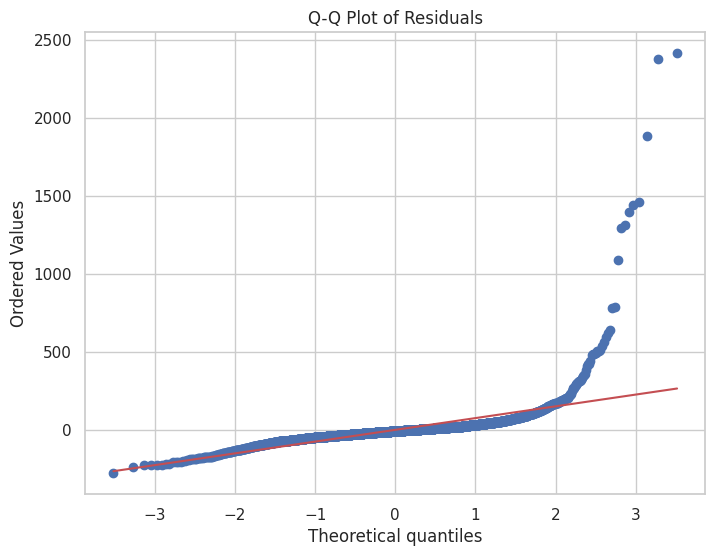

Text(0, 0.5, 'Frequency')

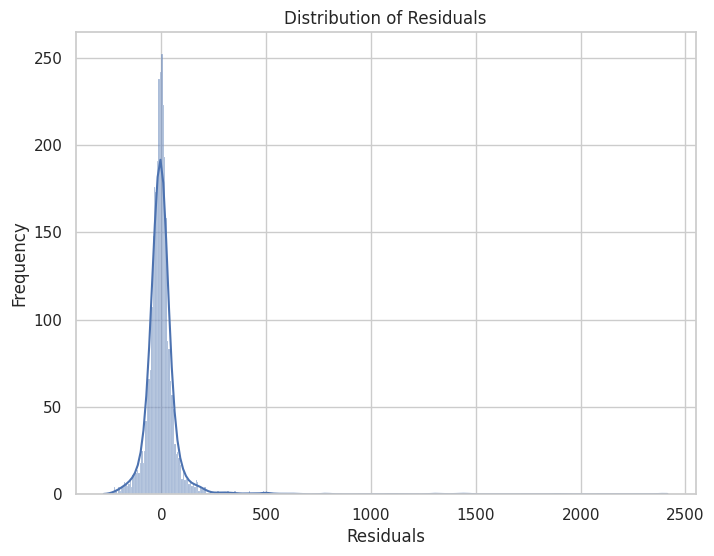

In [ ]:
residuals = y_test - y_pred
from scipy import stats

plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")


1. Q-Q Plot  we can infer that residual quantiles are not perfectly along a perfect normal distribution quantile. our model is prone to outliers as we can see.
2. although residual hist plot is centered around zero we can still see outliers present along the right side

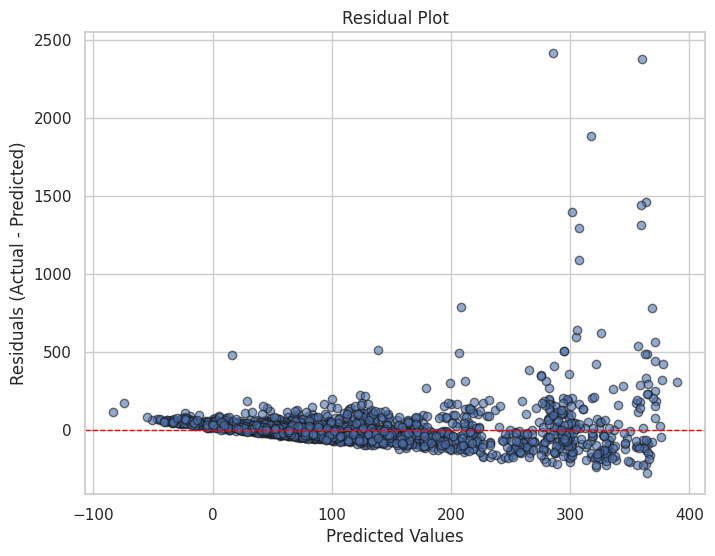

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, edgecolors='k')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.show()


we can see a lot of data either predicted overprices or underpriced. I feel outliers are the major issue for the model to not perform well. instead of clipping them. lets totally drop them.

In [ ]:
def drop_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 -1.5 * IQR
    upper_bound = Q3 +1.5 * IQR

    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

df = drop_outliers(df, 'total_sqft')
df = drop_outliers(df, 'bath')
df = drop_outliers(df, 'number_of_bedrooms')

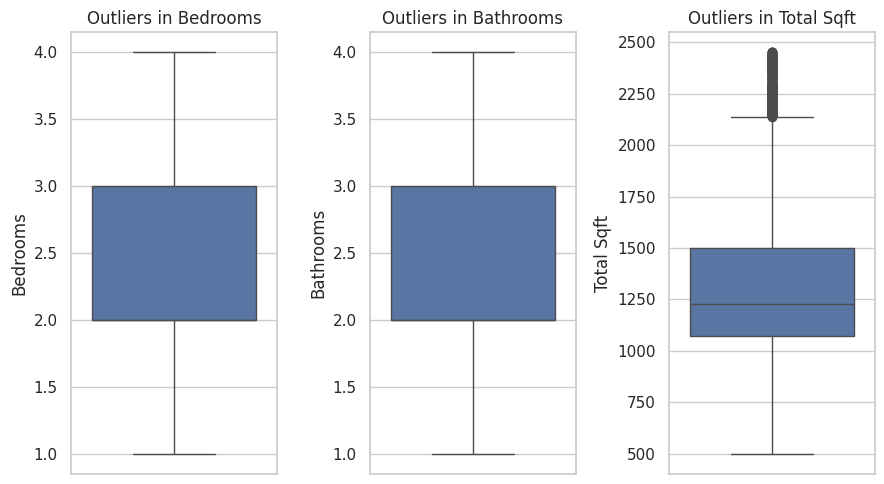

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 5))

plt.subplot(1, 4, 1)
sns.boxplot(data=df, y='number_of_bedrooms')
plt.title('Outliers in Bedrooms')
plt.ylabel('Bedrooms')

plt.subplot(1, 4, 2)
sns.boxplot(data=df, y='bath')
plt.title('Outliers in Bathrooms')
plt.ylabel('Bathrooms')

plt.subplot(1, 4, 3)
sns.boxplot(data=df, y='total_sqft')
plt.title('Outliers in Total Sqft')
plt.ylabel('Total Sqft')



plt.tight_layout()
plt.show()

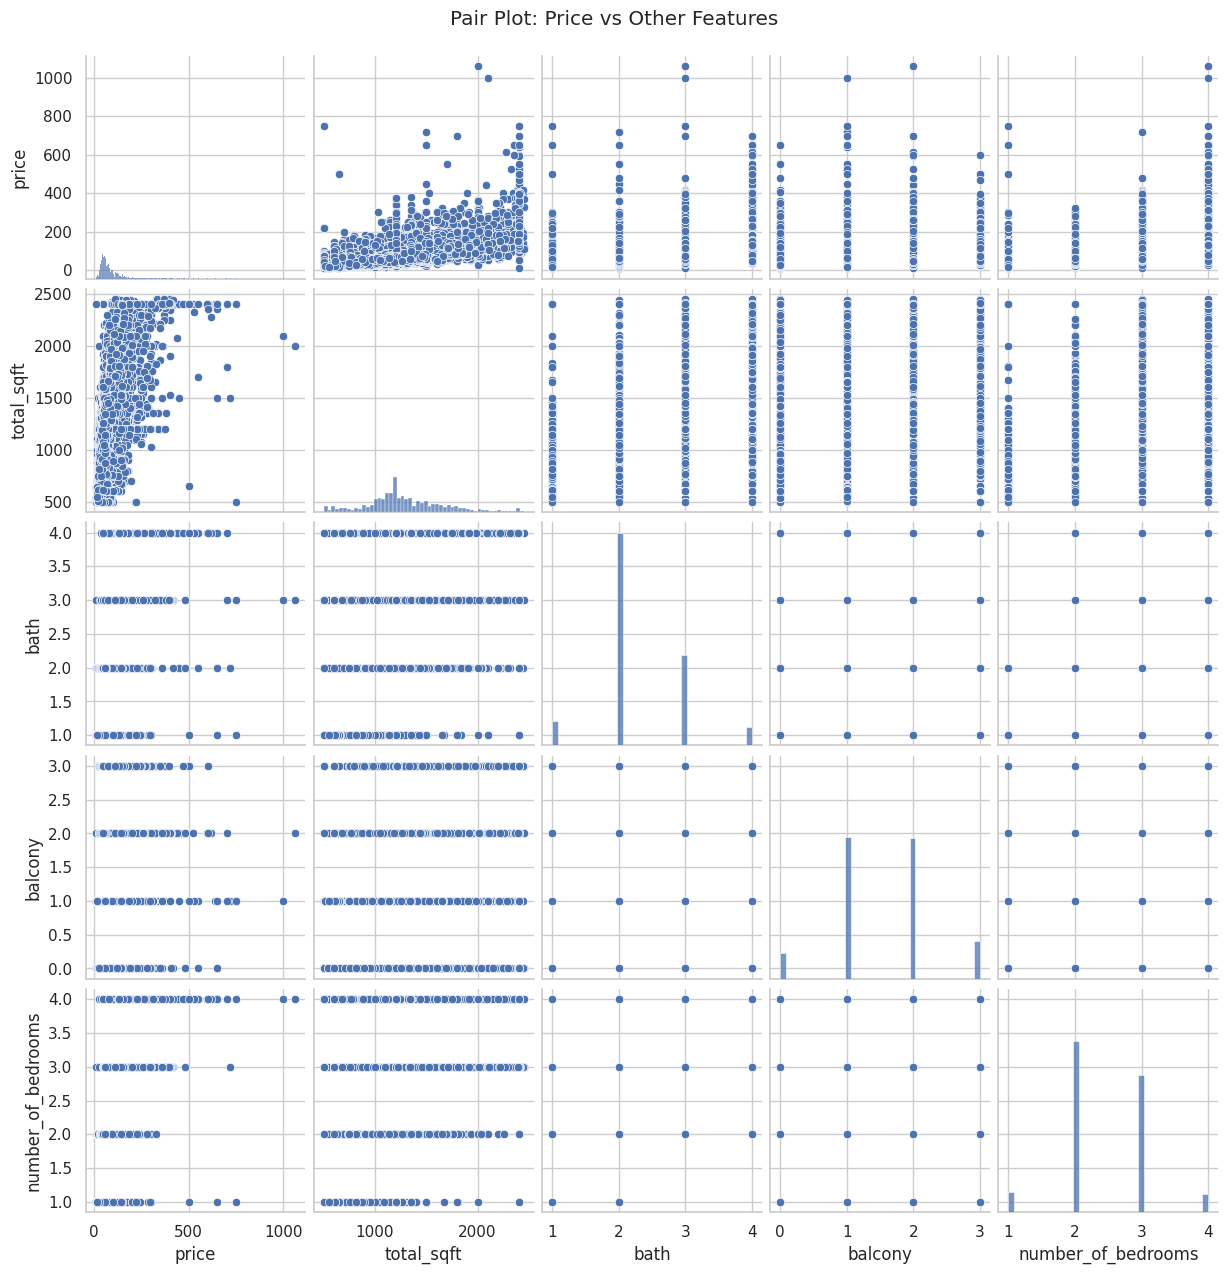

In [ ]:
cols_to_plot = ['price', 'total_sqft', 'bath', 'balcony', 'number_of_bedrooms']
df_pair = df[cols_to_plot]
sns.pairplot(df_pair)
plt.suptitle("Pair Plot: Price vs Other Features", y=1.02)
plt.show()

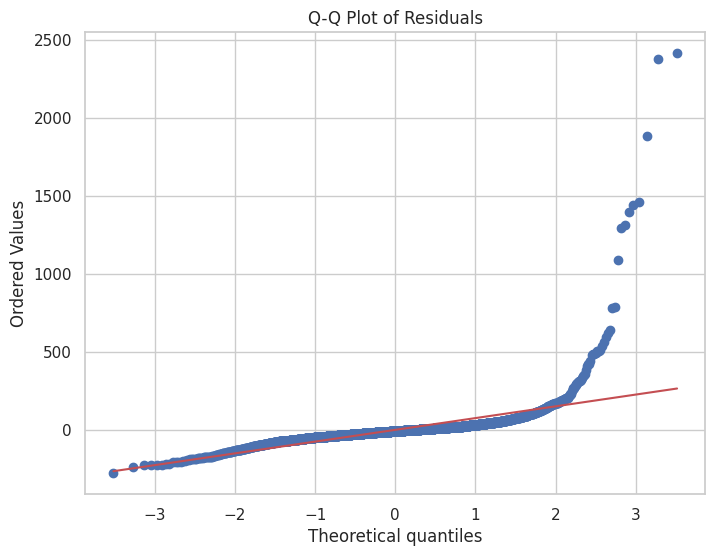

Text(0, 0.5, 'Frequency')

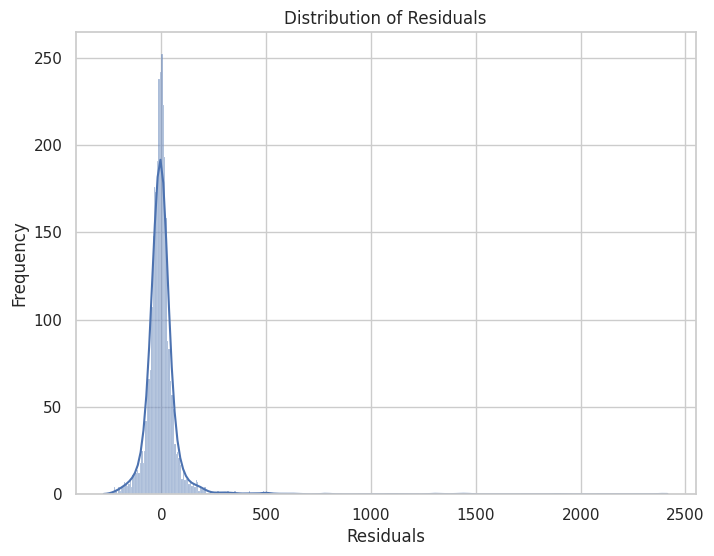

In [ ]:
residuals = y_test - y_pred
from scipy import stats

plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

# Model after Outlier Removal:
1. I ran the model after removing the outliers with the above code and these were the results.
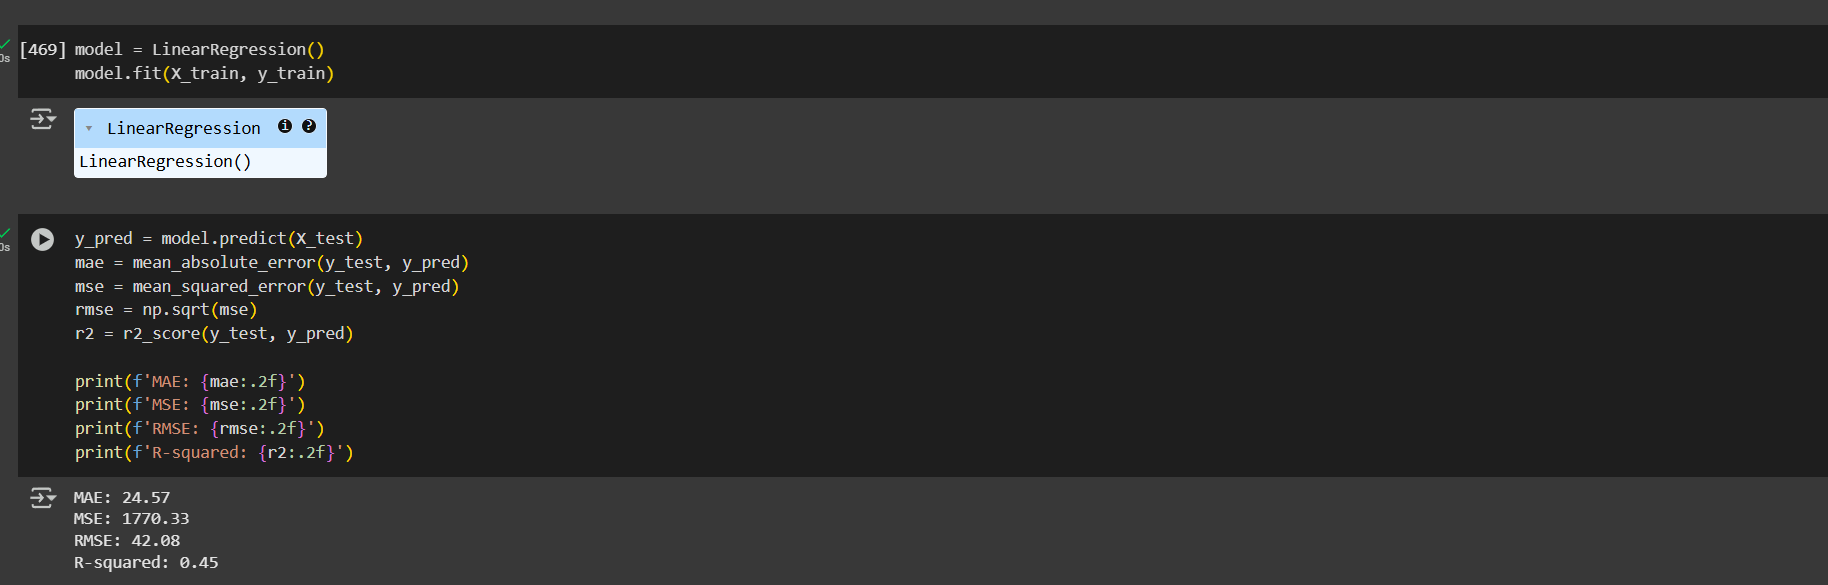

Getting around 8 percent increase in R2 score. which is a good improvement. I am giving a screenshot because I want to see the difference between both the models **(one with imputing outliers other with totally removing them)**

# Conclusion and Learnings

1. This model has a variability score of 45 percent which is not so great. but not so bad.
2. A good use case is to suggest prices for upcoming sites/properties in real estate website. it can be useful to give good estimates.
3. this data can overall be used as an  support tool to get an rough estimate.
4. the good thing is this is totally data backed so can be trusted.

5. This Project to be put in one line is 90 percent data preprocessing and 10 percent training. This Project tested my patience and good practices in coding. when it comes to universities teaching ML, people often obsess and learn the nitty gritties on Model training only. but this told a closed Truth. (i.e) Data preprocessing is every bit as important as Model training. because in real world data is mostly fragmented,unstructured and a lot of noise. A true ML engineer will only understand why we are performing Scaling. why we are doing scaling after splitting the data into training and testing , what does fit do and what does transform do and  what is problem with outliers and how to encode data.

6. I feel anyone who builds an LR model with this dataset achieving good metrics can be sure of themselves to tackle any kind of dataset like this. as this dataset truely tested your fundamentals on data preprocessing.